In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [6]:
df = pd.read_csv('Iris.csv')

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df = df.iloc[:,1:]

In [9]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder = LabelEncoder()

In [12]:
df['Species'] = encoder.fit_transform(df['Species'])

In [13]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [15]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

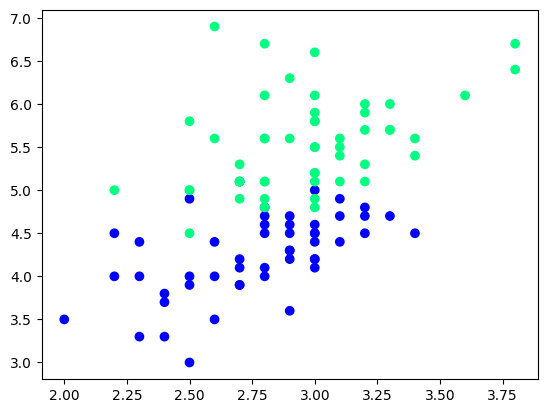

In [17]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [18]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
101,2.7,5.1,2
108,2.5,5.8,2
75,3.0,4.4,1
56,3.3,4.7,1
100,3.3,6.0,2
87,2.3,4.4,1
109,3.6,6.1,2
60,2.0,3.5,1
106,2.5,4.5,2
92,2.6,4.0,1


In [19]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [20]:
df_train

,SepalWidthCm,PetalLengthCm,Species
136,3.4,5.6,2
80,2.4,3.8,1
115,3.2,5.3,2
137,3.1,5.5,2
91,3.0,4.6,1
134,2.6,5.6,2
119,2.2,5.0,2
113,2.5,5.0,2
86,3.1,4.7,1
127,3.0,4.9,2


In [21]:
df_val

,SepalWidthCm,PetalLengthCm,Species
129,3.0,5.8,2
77,3.0,5.0,1
51,3.2,4.5,1
75,3.0,4.4,1
68,2.2,4.5,1


In [22]:
df_test

,SepalWidthCm,PetalLengthCm,Species
101,2.7,5.1,2
123,2.7,4.9,2
147,3.0,5.2,2
73,2.8,4.7,1
118,2.6,6.9,2


In [23]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [24]:
y_test

array([2, 1, 1, 1, 1])

# Case 1 - Bagging

In [33]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)#replace = true means sampling with replacement

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
80,2.4,3.8,1
86,3.1,4.7,1
80,2.4,3.8,1
86,3.1,4.7,1
119,2.2,5.0,2
137,3.1,5.5,2
113,2.5,5.0,2
137,3.1,5.5,2


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [35]:
dt_bag1 = DecisionTreeClassifier()

In [37]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

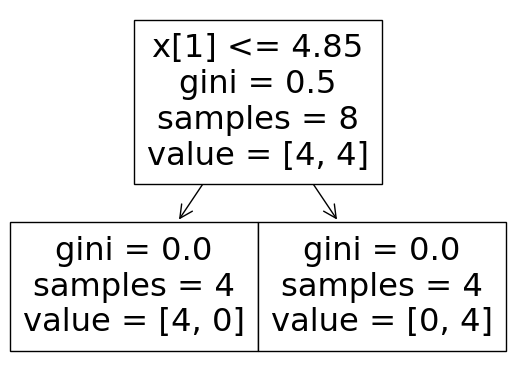

0.8


/Users/parajulitilak/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/parajulitilak/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


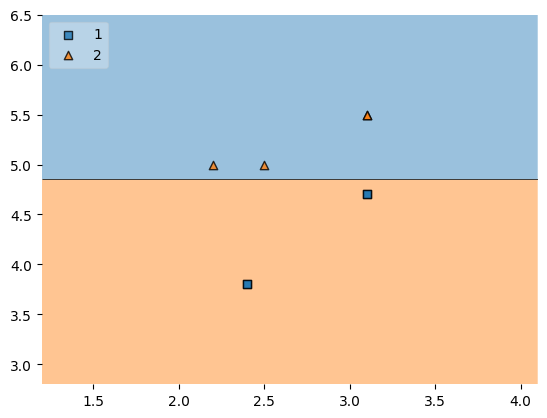

In [38]:
evaluate(dt_bag1,X,y)

In [39]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
115,3.2,5.3,2
134,2.6,5.6,2
80,2.4,3.8,1
115,3.2,5.3,2
137,3.1,5.5,2
86,3.1,4.7,1
136,3.4,5.6,2
115,3.2,5.3,2


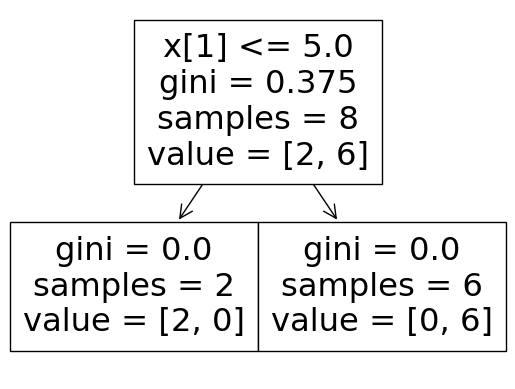

1.0


/Users/parajulitilak/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/parajulitilak/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


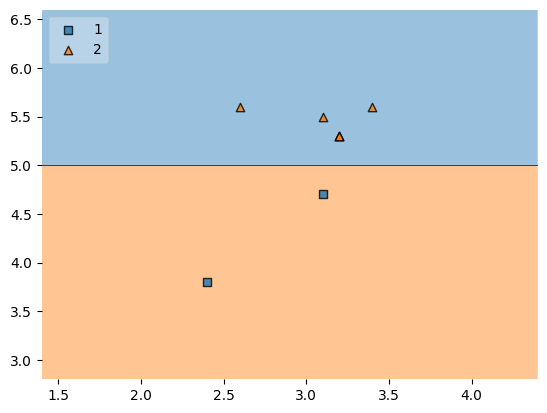

In [40]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [41]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
91,3.0,4.6,1
91,3.0,4.6,1
80,2.4,3.8,1
136,3.4,5.6,2
86,3.1,4.7,1
136,3.4,5.6,2
91,3.0,4.6,1
80,2.4,3.8,1


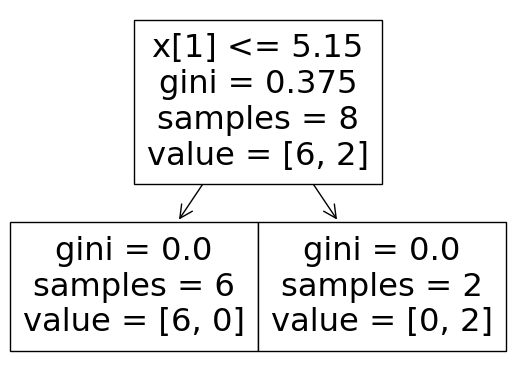

1.0


/Users/parajulitilak/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/parajulitilak/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


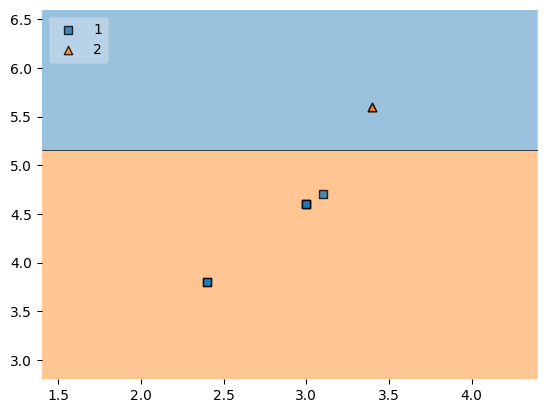

In [42]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

## Predict OR Aggregation Part

In [43]:
df_test

,SepalWidthCm,PetalLengthCm,Species
101,2.7,5.1,2
123,2.7,4.9,2
147,3.0,5.2,2
73,2.8,4.7,1
118,2.6,6.9,2


In [44]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [1]
Predictor 3 [1]


/Users/parajulitilak/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/parajulitilak/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/parajulitilak/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

In [45]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
136,3.4,5.6,2
80,2.4,3.8,1
115,3.2,5.3,2
137,3.1,5.5,2
91,3.0,4.6,1
134,2.6,5.6,2
119,2.2,5.0,2
113,2.5,5.0,2
86,3.1,4.7,1
127,3.0,4.9,2


In [46]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
86,3.1,4.7,1
136,3.4,5.6,2
91,3.0,4.6,1
127,3.0,4.9,2
134,2.6,5.6,2
119,2.2,5.0,2
137,3.1,5.5,2
115,3.2,5.3,2


# Random Subspaces

In [48]:
df1 = pd.read_csv('Iris.csv')
df1 = df1.sample(10)

In [61]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
134,135,6.1,2.6,5.6,1.4,Iris-virginica
12,13,4.8,3.0,1.4,0.1,Iris-setosa
13,14,4.3,3.0,1.1,0.1,Iris-setosa
146,147,6.3,2.5,5.0,1.9,Iris-virginica
38,39,4.4,3.0,1.3,0.2,Iris-setosa
62,63,6.0,2.2,4.0,1.0,Iris-versicolor
77,78,6.7,3.0,5.0,1.7,Iris-versicolor
45,46,4.8,3.0,1.4,0.3,Iris-setosa
109,110,7.2,3.6,6.1,2.5,Iris-virginica
10,11,5.4,3.7,1.5,0.2,Iris-setosa


In [49]:
df1.sample(2,replace=True,axis=1)

,PetalWidthCm,PetalLengthCm
58,1.3,4.6
4,0.2,1.4
144,2.5,5.7
119,1.5,5.0
42,0.2,1.3
147,2.0,5.2
76,1.4,4.8
69,1.1,3.9
21,0.4,1.5
148,2.3,5.4


# Random Patches

In [50]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
58,59,6.6,2.9,4.6,1.3,Iris-versicolor
4,5,5.0,3.6,1.4,0.2,Iris-setosa
144,145,6.7,3.3,5.7,2.5,Iris-virginica
119,120,6.0,2.2,5.0,1.5,Iris-virginica
42,43,4.4,3.2,1.3,0.2,Iris-setosa
147,148,6.5,3.0,5.2,2.0,Iris-virginica
76,77,6.8,2.8,4.8,1.4,Iris-versicolor
69,70,5.6,2.5,3.9,1.1,Iris-versicolor
21,22,5.1,3.7,1.5,0.4,Iris-setosa
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [51]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,Id,SepalLengthCm
119,120,6.0
147,148,6.5
69,70,5.6
144,145,6.7
148,149,6.2
144,145,6.7
76,77,6.8
21,22,5.1
